In [2]:
import networkx as nx
import glob
import numpy as np
import matplotlib.pyplot as plt

Read data

In [3]:
path = 'ordered_128/Pe0/'

data_array = []
data_fis = []

# Read in the data
for fi in glob.glob(path + '/fi*'):
    # extract the density from the path name
    density, run = tuple(fi.split('/')[2].split('_'))
    density = float(density.split('fi')[1])
    print(density, run)
    trj = glob.glob(fi + '/Trj/xyz.dump.*')[-1]
    print(trj)
    data = np.loadtxt(trj, skiprows=9)
        
    
    data_array.append(data[:,[1,2]])
    data_fis.append(density)


0.708 8
ordered_128/Pe0/fi0.708_8/Trj/xyz.dump.86000000
0.722 7
ordered_128/Pe0/fi0.722_7/Trj/xyz.dump.86000000
0.702 6
ordered_128/Pe0/fi0.702_6/Trj/xyz.dump.86000000
0.732 1
ordered_128/Pe0/fi0.732_1/Trj/xyz.dump.40000000
0.704 8
ordered_128/Pe0/fi0.704_8/Trj/xyz.dump.86000000
0.729 1
ordered_128/Pe0/fi0.729_1/Trj/xyz.dump.40000000
0.704 6
ordered_128/Pe0/fi0.704_6/Trj/xyz.dump.86000000
0.706 8
ordered_128/Pe0/fi0.706_8/Trj/xyz.dump.86000000
0.7 6
ordered_128/Pe0/fi0.700_6/Trj/xyz.dump.86000000
0.724 8
ordered_128/Pe0/fi0.724_8/Trj/xyz.dump.86000000
0.72 1
ordered_128/Pe0/fi0.720_1/Trj/xyz.dump.270000000
0.712 7
ordered_128/Pe0/fi0.712_7/Trj/xyz.dump.86000000
0.716 8
ordered_128/Pe0/fi0.716_8/Trj/xyz.dump.86000000
0.714 8
ordered_128/Pe0/fi0.714_8/Trj/xyz.dump.86000000
0.718 8
ordered_128/Pe0/fi0.718_8/Trj/xyz.dump.86000000
0.712 8
ordered_128/Pe0/fi0.712_8/Trj/xyz.dump.86000000
0.72 8
ordered_128/Pe0/fi0.720_8/Trj/xyz.dump.86000000
0.736 1
ordered_128/Pe0/fi0.736_1/Trj/xyz.dump.4000

In [4]:
def smaller_sys(pos, edge):
    """Return the positions of the particles that are within the edge of the box"""
    return pos[(pos[:,0] < edge) & (pos[:,1] < edge)]

In [5]:
index = 3
new_conf = smaller_sys(data_array[index], 5)

print(data_array[index].shape)
print(new_conf.shape)


(16384, 2)
(28, 2)


In [10]:
# reduce all the configurations 

for i, conf in enumerate(data_array):
    new_conf = smaller_sys(conf, 5)
    data_array[i] = new_conf

In [7]:
from scipy.spatial import distance_matrix

def distance_matrix_pbx(x: np.ndarray, y: np.ndarray, box: np.ndarray):
    '''Compute the distance matrix between two sets of points with periodic boundary conditions'''
    x = np.asarray(x)
    y = np.asarray(y)
    if x.shape[1] != y.shape[1]:
        raise ValueError("x and y must have the same number of columns")
    if x.shape[1] != box.shape[0]:
        raise ValueError("x and box must have the same number of columns")
    if x.shape[1] != 2:
        raise ValueError("x and box must have 2 columns")
    if x.shape[0] == 0 or y.shape[0] == 0:
        return np.empty((x.shape[0], y.shape[0]))
    d = x - y
    d -= box * np.rint(d / box)
    return np.sqrt(np.sum(d**2, axis=-1))

def discretize_distance_matrix(distance_matrix):
    '''Discretize the distance matrix'''
    np.where(distance_matrix <= 1.5, 1, 0)
    return distance_matrix

In [7]:
# plt.figure(figsize=(10,10))
# for i,conf in enumerate(data_array[:16]):
#     plt.subplot(4,4,i+1)
#     dist = distance_matrix(conf, conf)
#     dist = np.where(dist <= 1.5, 1, 0)
#     print(dist.shape)
#     #G = nx.from_numpy_matrix(dist)
#     plt.imshow(dist, origin='lower',interpolation='nearest')
#     plt.xticks([])
#     plt.yticks([])
#     plt.xlabel(data_fis[i])
# plt.colorbar()
# plt.show()

4.650497676872874
[4.90184 2.9472 ] [0.61233 1.15075]
4.650497676872874


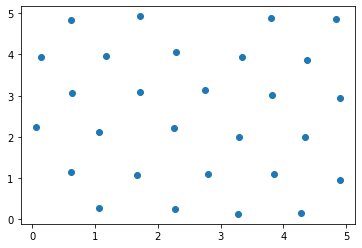

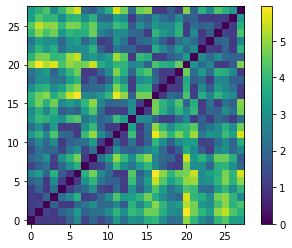

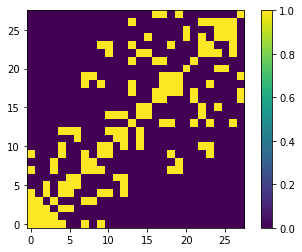

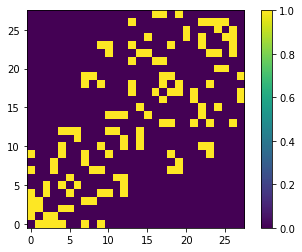

In [18]:
#test 
index = 3
dist = distance_matrix(data_array[index], data_array[index])
# remove the diagonal
dist_discret = np.where(dist <= 1.5, 1, 0)
dist_nodiag = dist_discret - np.diag(np.diag(dist_discret))

print(dist[15,3])
print(data_array[index][15], data_array[index][3])
print(np.sqrt((data_array[index][15,0] - data_array[index][3,0])**2 + (data_array[index][15,1] - data_array[index][3,1])**2))

plt.plot(data_array[index][:,0], data_array[index][:,1], 'o')
plt.show()

plt.imshow(dist, origin='lower')
plt.colorbar()
plt.show()

plt.clf()
plt.imshow(dist_discret, origin='lower')
plt.colorbar()
plt.show()

plt.clf()
plt.imshow(dist_nodiag, origin='lower')
plt.colorbar()
plt.show()

In [25]:
# graph analysis of the network
for i,conf in enumerate(data_array[:16]):
    # print(f"+++ Density: {data_fis[i]} +++")
    dist = distance_matrix(conf, conf)
    dist = np.where(dist <= 1.50, 1, 0)
    dist = dist - np.diag(np.diag(dist))
    G = nx.from_numpy_array(dist)
    # computing average degree
    avg_degree = np.mean(list(dict(G.degree()).values()))
    print(data_fis[i], avg_degree)
    
    # print("A")
    # print("Number of nodes: ", G.number_of_nodes())
    # print("Average shortest path: ", nx.average_shortest_path_length(G))
    # print("Average clustering :", nx.average_clustering(G))
    # print("Number of connected components: ", nx.number_connected_components(G))
    # print("Degree: ", nx.degree_histogram(G))

    # print("A**3")
    # G = G * G * G
    # #print("Number of nodes: ", G.number_of_nodes())
    # print("Average shortest path: ", nx.average_shortest_path_length(G))
    # print("Average clustering :", nx.average_clustering(G))
    # print("Number of connected components: ", nx.number_connected_components(G))
    # print("Degree: ", nx.degree_histogram(G))

    # print("A**6")
    # G = G * G * G
    # #print("Number of nodes: ", G.number_of_nodes())
    # print("Average shortest path: ", nx.average_shortest_path_length(G))
    # print("Average clustering :", nx.average_clustering(G))
    # print("Number of connected components: ", nx.number_connected_components(G))
    # print("Degree: ", nx.degree_histogram(G))


+++ Density: 0.708 +++
A
Average shortest path:  2.600790513833992
Average clustering : 0.5246376811594203
Number of connected components:  1
Degree:  [0, 0, 1, 7, 4, 3, 8]
+++ Density: 0.722 +++
A
Average shortest path:  2.6205533596837944
Average clustering : 0.5173913043478261
Number of connected components:  1
Degree:  [0, 0, 1, 7, 5, 3, 7]
+++ Density: 0.702 +++
A
Average shortest path:  2.5714285714285716
Average clustering : 0.4746031746031747
Number of connected components:  1
Degree:  [0, 1, 1, 6, 5, 3, 5]
+++ Density: 0.732 +++
A
Average shortest path:  2.8994708994708995
Average clustering : 0.5178571428571429
Number of connected components:  1
Degree:  [0, 0, 1, 9, 3, 5, 10]
+++ Density: 0.704 +++
A
Average shortest path:  2.658008658008658
Average clustering : 0.490909090909091
Number of connected components:  1
Degree:  [0, 1, 1, 7, 4, 4, 5]
+++ Density: 0.729 +++
A
Average shortest path:  2.7065217391304346
Average clustering : 0.5541666666666668
Number of connected comp

In [21]:
# draw the graph

conf = data_array[0]
print(data_fis[i])
plt.figure(figsize=(100,100))
dist = distance_matrix(conf, conf)
dist = np.where(dist <= 1.5, 1, 0)
dist = dist - np.diag(np.diag(dist))
G = nx.from_numpy_array(dist)
nx.draw(G, with_labels=False, font_weight='bold')
plt.show()

0.712
